## Problem4

It is vital for banks that customers put in long term fixed deposits as they use it to pay interest to customers and it is not viable to ask every customer if they will put in a long-term deposit or not. So, build a Logistic Regression model to predict whether a customer will put in a long-term fixed deposit or not based on the different variables given in the data. The output variable in the dataset is Y which is binary. Snapshot of the dataset is given below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

#Importing Data
data = pd.read_csv("bank_data.csv", sep = ",")


In [2]:
data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
data.shape

(45211, 32)

In [4]:
data.dtypes

age                int64
default            int64
balance            int64
housing            int64
loan               int64
duration           int64
campaign           int64
pdays              int64
previous           int64
poutfailure        int64
poutother          int64
poutsuccess        int64
poutunknown        int64
con_cellular       int64
con_telephone      int64
con_unknown        int64
divorced           int64
married            int64
single             int64
joadmin.           int64
joblue.collar      int64
joentrepreneur     int64
johousemaid        int64
jomanagement       int64
joretired          int64
joself.employed    int64
joservices         int64
jostudent          int64
jotechnician       int64
jounemployed       int64
jounknown          int64
y                  int64
dtype: object

In [7]:
data[data.duplicated()]

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
26091,54,0,0,0,0,214,3,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data[data.duplicated()]

In [8]:
data.drop_duplicates(keep='first',inplace= True)

In [19]:
data.var()

age                1.127568e+02
default            1.770240e-02
balance            9.270763e+06
housing            2.468862e-01
loan               1.345593e-01
duration           6.632200e+04
campaign           9.597944e+00
pdays              1.002595e+04
previous           5.305951e+00
poutfailure        9.665567e-02
poutother          3.904342e-02
poutsuccess        3.230551e-02
poutunknown        1.492136e-01
con_cellular       2.281801e-01
con_telephone      6.014751e-02
con_unknown        2.050560e-01
divorced           1.019109e-01
married            2.396167e-01
single             2.028730e-01
joadmin.           1.012974e-01
joblue.collar      1.689281e-01
joentrepreneur     3.180984e-02
johousemaid        2.667588e-02
jomanagement       1.654270e-01
joretired          4.757072e-02
joself.employed    3.370683e-02
joservices         8.344181e-02
jostudent          2.031761e-02
jotechnician       1.398044e-01
jounemployed       2.799102e-02
jounknown          6.329832e-03
y       

<AxesSubplot:>

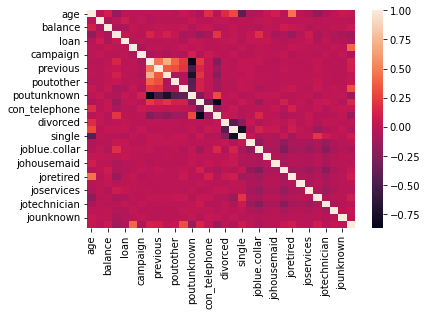

In [9]:
# check correlations in train data with a heatmap
sns.heatmap(data.corr())

In [16]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()

In [17]:
X = trans.fit_transform(data.iloc[:,0:31])
y = data.iloc[:,31]

In [18]:
X

array([[ 1.6070013 , -0.13549141,  0.25640709, ..., -0.44941967,
        -0.17226828, -0.08006942],
       [ 0.28855812, -0.13549141, -0.43790072, ...,  2.22509175,
        -0.17226828, -0.08006942],
       [-0.74736152, -0.13549141, -0.44676841, ..., -0.44941967,
        -0.17226828, -0.08006942],
       ...,
       [ 2.92544448, -0.13549141,  1.42957051, ..., -0.44941967,
        -0.17226828, -0.08006942],
       [ 1.51282679, -0.13549141, -0.2280319 , ..., -0.44941967,
        -0.17226828, -0.08006942],
       [-0.37066347, -0.13549141,  0.52834979, ..., -0.44941967,
        -0.17226828, -0.08006942]])

In [59]:
data[data.duplicated()]

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,City,Male,Country,month,Clicked_Ad


In [54]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()


In [63]:
X = trans.fit_transform(data.iloc[:,0:8])
y = data.iloc[:,8]

In [20]:
X.shape

(45210, 31)

In [21]:
y.shape

(45210,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Random Forest Classifier

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


RF train roc-auc: 1.0
RF test roc-auc: 0.8831579329991992


### Logistic Classifier

In [25]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_logistic = log_classifier.decision_function(X_test)

Logistic train roc-auc: 0.894954088359387
Logistic test roc-auc: 0.8815653394574392


### Adaboost Classifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_adaboost = ada_classifier.decision_function(X_test)

Adaboost train roc-auc: 0.904898359069419
Adaboost test roc-auc: 0.8892879053267064


### KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('knn train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('knn test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

knn train roc-auc: 0.9490136249249362
knn test roc-auc: 0.7886890581467537


### SVM Classifier

In [28]:
from sklearn.svm import SVC
model_SVC=SVC(kernel = 'rbf', random_state = 4,probability=True)
model_SVC.fit(X_train, y_train)
ytrain_pred = model_SVC.predict_proba(X_train)
print('svm train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model_SVC.predict_proba(X_test)
print('svm test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_svm = model_SVC.decision_function(X_test)

svm train roc-auc: 0.888010309113299
svm test roc-auc: 0.8315006691921106


### Ensemble

In [29]:
pred=[]
for model in [log_classifier,ada_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8842946181682391


### Get the optimum threshold and plot ROC curve

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.7611308 , 0.7611308 , 0.75733813, ..., 0.23033132, 0.23031062,
       0.22415474])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
379,0.520025,0.895967
376,0.521807,0.895893
377,0.520903,0.895893
380,0.519253,0.895893
378,0.520285,0.895893


We choose the threshold 0.52 with accuracy of 0.895

In [32]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

F1 Score: 0.21081794195250658


In [33]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label=' ROC ensemble (auc = %0.3f)')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

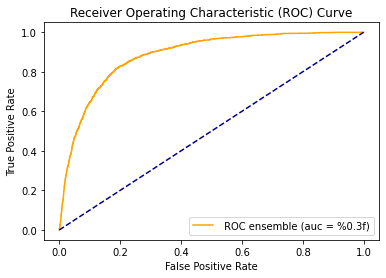

In [34]:
plot_roc_curve(fpr,tpr)